### Projekt Pinguin

<img src='https://img.freepik.com/vektoren-kostenlos/illustrator-von-koerperteilen-des-pinguins_65947-757.jpg?size=626&ext=jpg' width='400px;'/>

Gegeben sind zwei Dateien `penguins_size.csv` und `penguins_lter.csv`. Untersuchen Sie eine von diesen mit Pandas und erstellen Sie, wenn möglich, ein optimales Modell, welches die Zuordnung von Pinguinen anhand ihrer physikalischen Merkmale zu den gegebenen Kategorien beschreiben kann. Exportieren Sie dann das Modell als Datei und überprüfen Sie dann seine Leistung noch einmal.

_(alle Schritte ähnlich wie in `datenanalyse_projekt_schritte.jpnb`)_

Versucht die Modelle mit GridSearch zu erstellen. Sucht euch dabei für jedes Modell ein paar Hyperparameter zum Ausprobieren aus. Stellt sicher, dass CorssValidation verwendet wird.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_csv('penguins_size.csv')

In [23]:
df2 = pd.read_csv('penguins_lter.csv')
df2.head() 

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
df.shape

(344, 7)

In [26]:
df.describe() 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
df.head() 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [28]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [29]:
df.groupby('sex').size()

sex
.           1
FEMALE    165
MALE      168
dtype: int64

In [30]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [31]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [32]:
nans = df[df.isna().sum(axis=1) > 1]
df_cleaned = df.drop(nans.index, axis=0)

In [33]:
df_cleaned.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Separate rows with known and missing `sex`
known_sex = df_cleaned[df_cleaned['sex'].notna()]
missing_sex = df_cleaned[df_cleaned['sex'].isna()]

# Encode categorical variables
encoder_species = LabelEncoder()
encoder_island = LabelEncoder()
known_sex['species'] = encoder_species.fit_transform(known_sex['species'])
known_sex['island'] = encoder_island.fit_transform(known_sex['island'])

# Prepare feature set and target variable
X = known_sex[['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = known_sex['sex'].apply(lambda x: 1 if x == 'MALE' else 0)  # Encode target as binary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Predict missing `sex` values

missing_sex['species'] = encoder_species.transform(missing_sex['species'])
missing_sex['island'] = encoder_island.transform(missing_sex['island'])
X_missing = missing_sex[['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
predicted_sex = pd.Series(model.predict(X_missing))  # Convert predictions to a pandas Series
missing_sex['sex'] = predicted_sex.map({1: 'MALE', 0: 'FEMALE'})  # Map predictions to 'MALE'/'FEMALE'

# Combine datasets
df_cleaned.update(missing_sex)


Accuracy: 0.8955223880597015


In [35]:
df_cleaned.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [36]:
df.groupby('species').size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

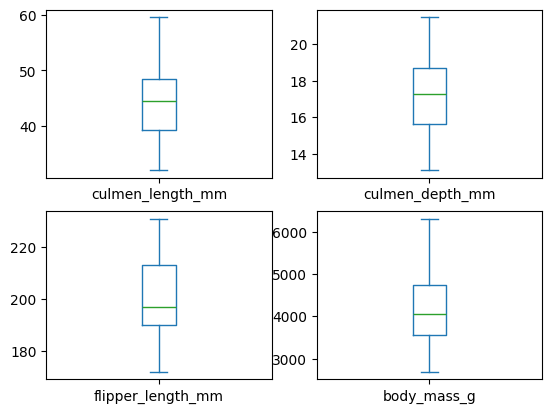

In [37]:
df.plot(kind='box',           # welche Art Diagramm (kind)
        subplots=True,        # mehrere Diagramme auf einem Bild
        layout=(2,2),         # Leinwand-Layout: 2 Reihen und 2 Spalten
        sharex=False,         # jedes (Unter-)Diagramm mit eigene x-Achse
        sharey=False          # jedes (Unter-)Diagramm mit eigene y-Achse
       )
plt.show()

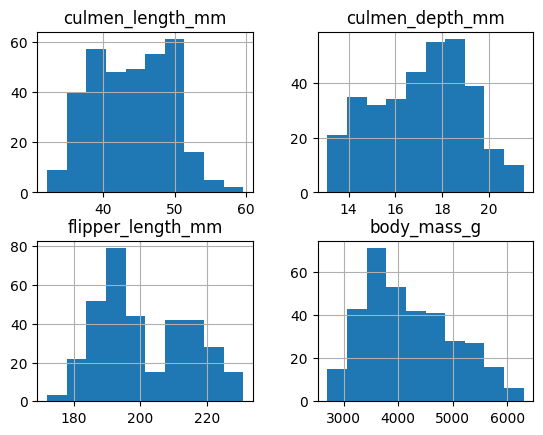

In [38]:
df.hist()
plt.show()